# Позиция: стажёр дата сайнтист
# Компания: телеком

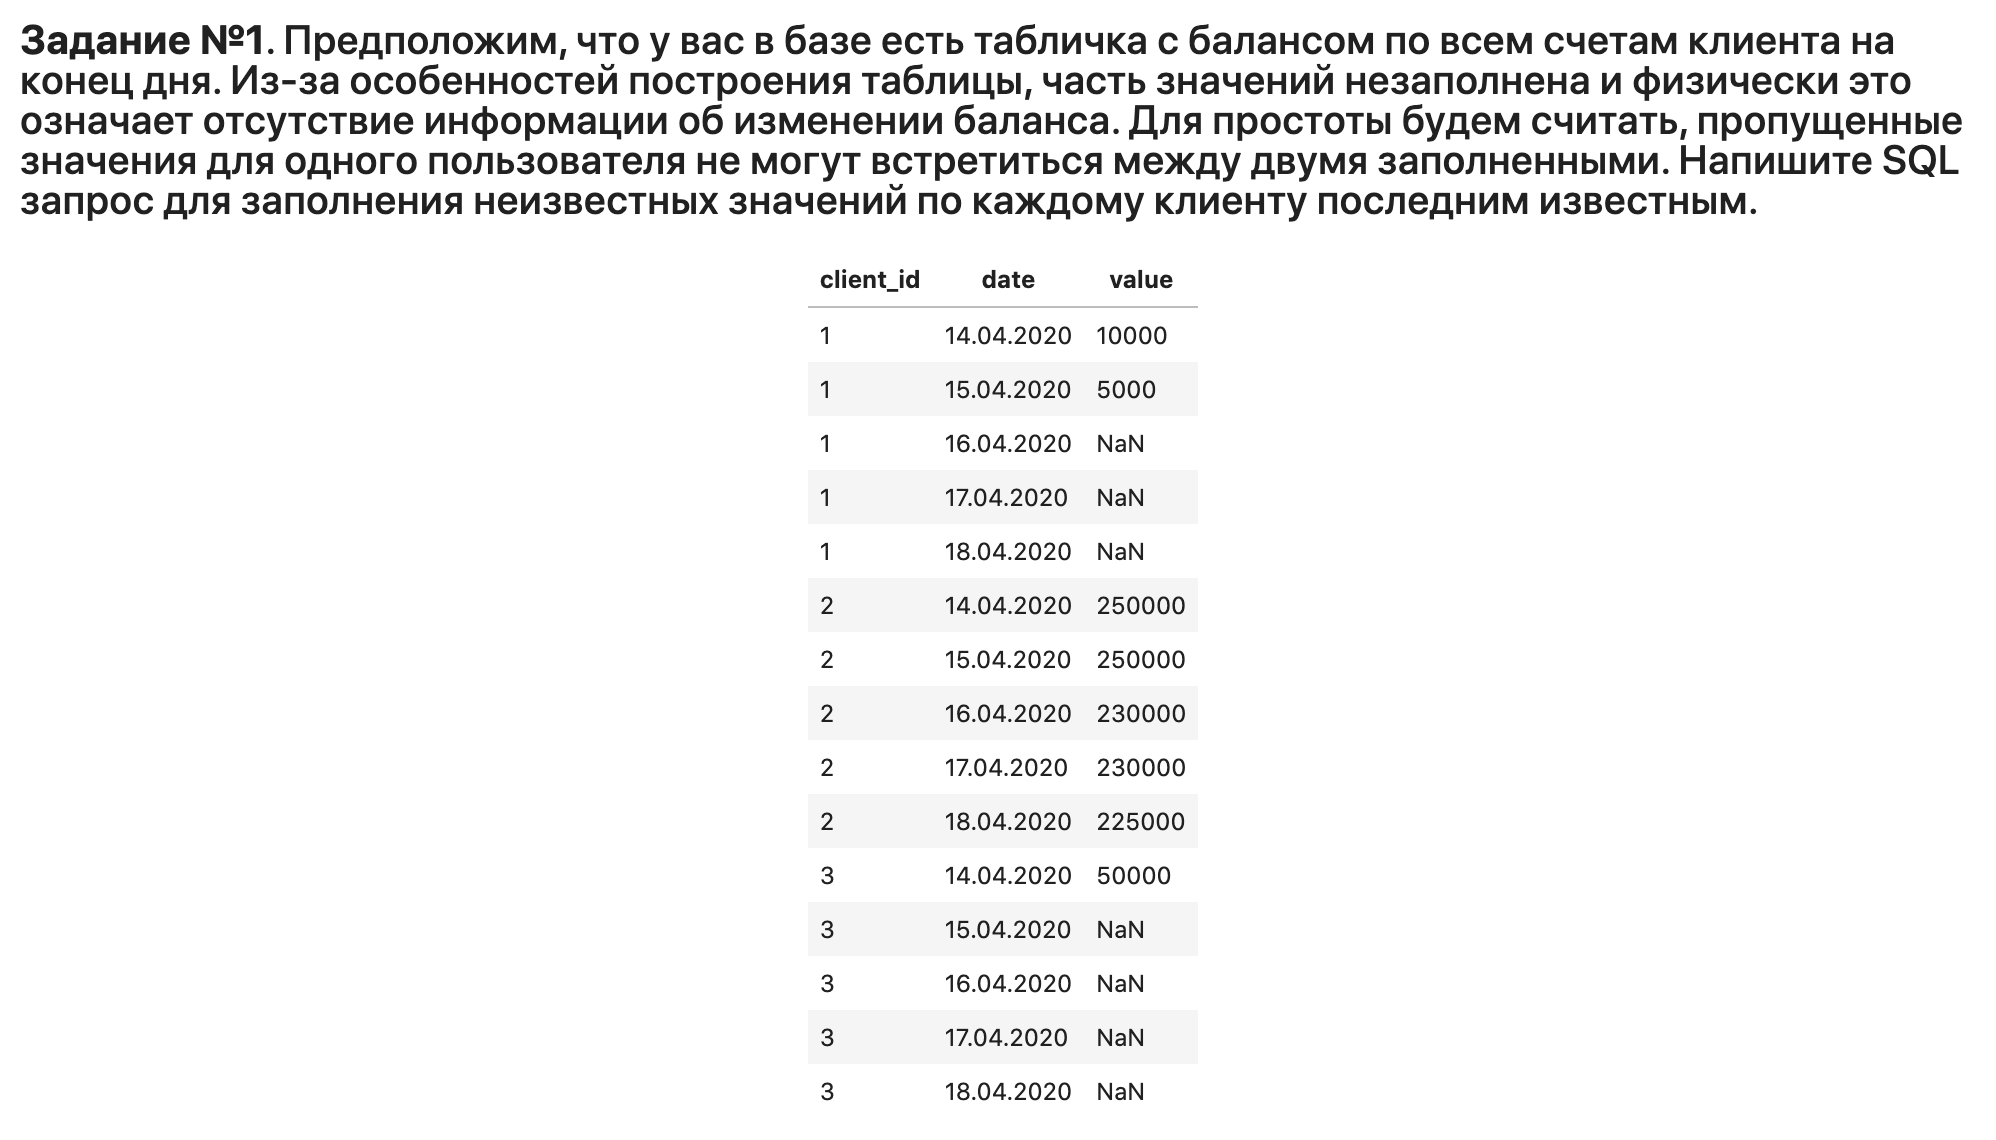

In [ ]:
## Решение
# select t.*,
#        (array_remove(array_agg(value)over (partition by client_id order by date), 'NaN'))[cardinality(array_remove(array_agg(value)over (partition by client_id order by date), 'NaN'))]
# from t;

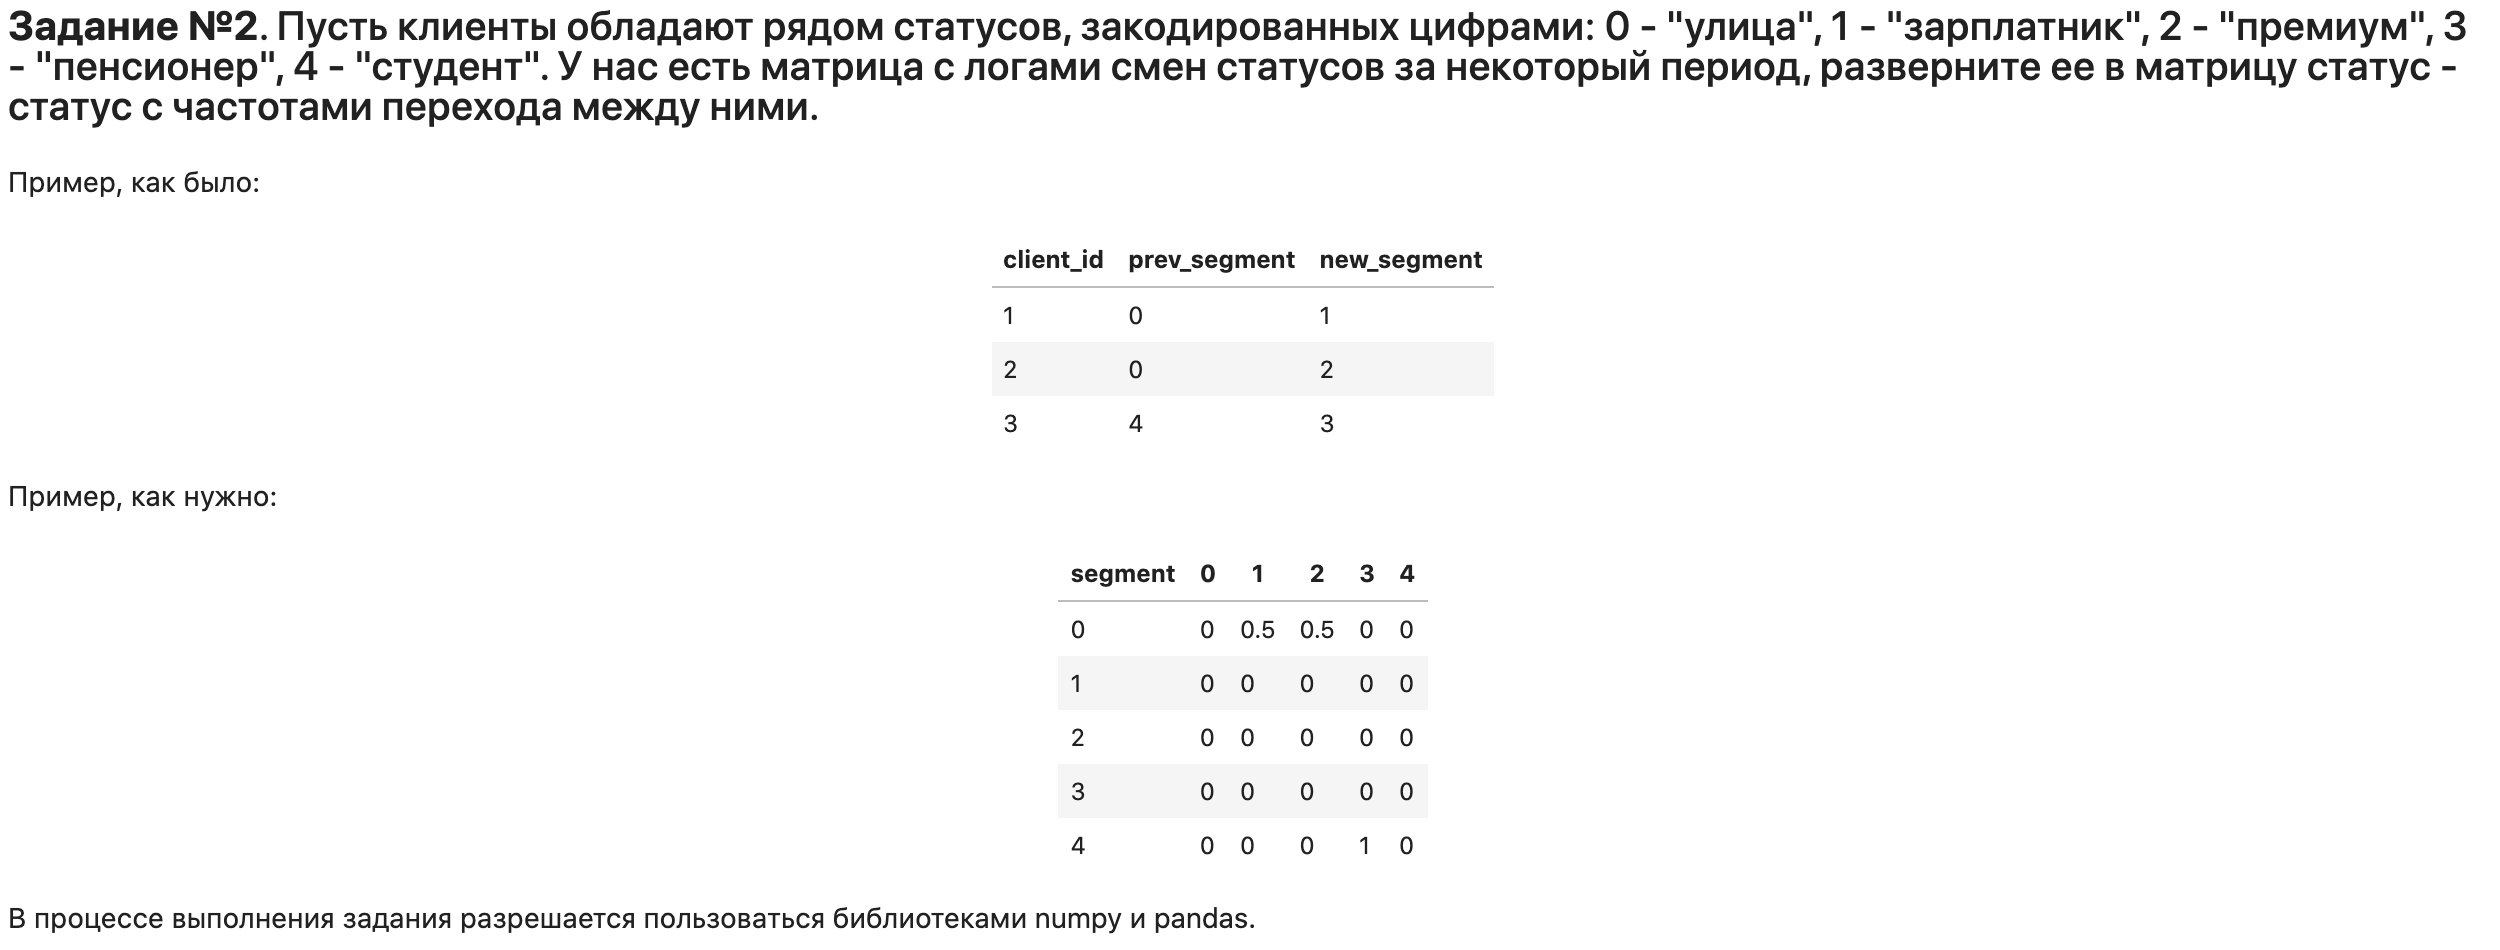

In [ ]:
import numpy as np
import pandas as pd

# Сгенерируем данные для задачи
data = pd.DataFrame(
    np.random.randint(low=0, high=5, size=(50000000, 2)),
    columns=['prev_segment', 'new_segment']
)

In [ ]:
data.head()

,prev_segment,new_segment
0,3,4
1,1,2
2,2,0
3,3,4
4,2,4


In [ ]:
df = pd.crosstab(data.prev_segment, data.new_segment, normalize='index')
idx = df.columns.union(df.index)
df = df.reindex(index = idx, columns=idx)
print(df)

          0         1         2         3         4
0  0.199941  0.200065  0.199760  0.200187  0.200048
1  0.200104  0.199991  0.200011  0.199899  0.199996
2  0.199763  0.200104  0.200112  0.200013  0.200008
3  0.199963  0.199942  0.200243  0.199936  0.199916
4  0.200048  0.199860  0.200230  0.199918  0.199944


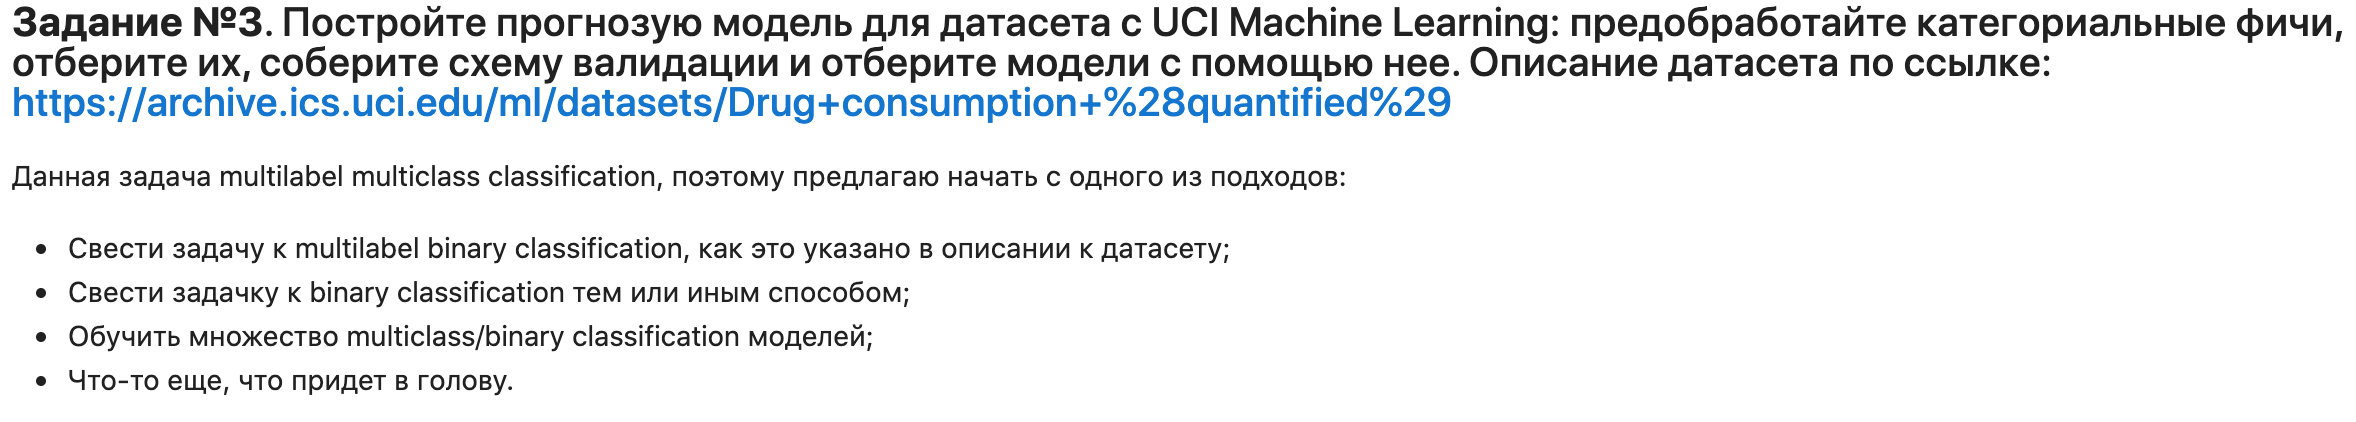

In [ ]:
# # Описание
# https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data

--2022-01-25 18:47:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 346695 (339K) [application/x-httpd-php]
Saving to: ‘drug_consumption.data.1’

drug_consumption.da 100%[===================>] 338.57K  1.28MB/s    in 0.3s    

2022-01-25 18:47:18 (1.28 MB/s) - ‘drug_consumption.data.1’ saved [346695/346695]



In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv('drug_consumption.data', header=None, index_col=0)

## Работа с данными

"All input attributes are originally categorical and are quantified. After quantification values of all input features can be considered as real-valued. "

1. Подготовка данных

In [ ]:
demographic_columns = [
    'Age', 
    'Gender', 
    'Education', 
    'Country',
    'Ethnicity',
]

In [ ]:
personality_columns = [
    'Neuroticism',
    'Extraversion',
    'Openness to experience',
    'Agreeableness',
    'Conscientiousness',
    'Impulsiveness',
    'Sensation seeking'
]

In [ ]:
feature_columns = demographic_columns + personality_columns

In [ ]:
drugs_columns = [
    'Alcohol consumption',
    'Amphetamines consumption',
    'Amyl nitrite consumption',
    'Benzodiazepine consumption',
    'Caffeine consumption',
    'Cannabis consumption',
    'Chocolate consumption',
    'Cocaine consumption',
    'Crack consumption',
    'Ecstasy consumption',
    'Heroin consumption',
    'Ketamine consumption',
    'Legal highs consumption',
    'Lysergic acid diethylamide consumption',
    'Methadone consumption',
    'Magic mushrooms consumption',
    'Nicotine consumption',
    'Fictitious drug Semeron consumption',
    'Volatile substance abuse consumption'
]

In [ ]:
drugs_legal = ['Alcohol consumption', 'Caffeine consumption', 'Chocolate consumption', 'Nicotine consumption']

In [ ]:
drugs_illegal = [drug for drug in drugs_columns if drug not in drugs_legal]

In [ ]:
all_columns = feature_columns + drugs_columns

In [ ]:
data.columns = all_columns

In [ ]:
#  переведём данные употребления из категориальных в номинальные
for i in drugs_columns:
    data[i] = data[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})

In [ ]:
# удалим людей, которые утверждали что употребляли Semeron (несуществующий наркотик), т.к их показаниям доверять нельзя
data = data[data['Fictitious drug Semeron consumption'] == 0]
# из списка удаляем
drugs_columns.remove('Fictitious drug Semeron consumption')
drugs_illegal.remove('Fictitious drug Semeron consumption')
# удаляем колонки
data = data.drop(columns='Fictitious drug Semeron consumption')
data.shape

(1877, 30)

In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
data.head()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Volatile substance abuse consumption
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     1877 non-null   float64
 1   Gender                                  1877 non-null   float64
 2   Education                               1877 non-null   float64
 3   Country                                 1877 non-null   float64
 4   Ethnicity                               1877 non-null   float64
 5   Neuroticism                             1877 non-null   float64
 6   Extraversion                            1877 non-null   float64
 7   Openness to experience                  1877 non-null   float64
 8   Agreeableness                           1877 non-null   float64
 9   Conscientiousness                       1877 non-null   float64
 10  Impulsiveness                           1877 non-null   floa

In [ ]:
data.describe()

,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness to experience,Agreeableness,Conscientiousness,Impulsiveness,Sensation seeking,Alcohol consumption,Amphetamines consumption,Amyl nitrite consumption,Benzodiazepine consumption,Caffeine consumption,Cannabis consumption,Chocolate consumption,Cocaine consumption,Crack consumption,Ecstasy consumption,Heroin consumption,Ketamine consumption,Legal highs consumption,Lysergic acid diethylamide consumption,Methadone consumption,Magic mushrooms consumption,Nicotine consumption,Volatile substance abuse consumption
count,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000,1877.000000
mean,0.037577,-0.000771,-0.000984,0.358984,-0.309728,-0.000551,-0.001951,-0.003224,-0.000657,-0.000394,0.005293,-0.007408,4.637720,1.337773,0.606819,1.461907,5.484283,2.980288,5.109750,1.156633,0.295685,1.309536,0.372403,0.564198,1.353223,1.053277,0.826319,1.177944,3.194992,0.429409
std,0.878387,0.482588,0.949831,0.699707,0.166220,0.998442,0.997418,0.995691,0.996689,0.997657,0.954148,0.962074,1.328234,1.782384,1.064005,1.869193,1.115119,2.286778,1.085716,1.510791,0.835925,1.647373,1.034761,1.216341,1.790881,1.484582,1.648379,1.459212,2.415814,0.959160
min,-0.951970,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.951970,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,4.000000,0.000000,0.000000,0.000000,5.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,-0.078540,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,5.000000,0.000000,0.000000,0.000000,6.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,0.497880,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,6.000000,2.000000,1.000000,3.000000,6.000000,5.000000,6.000000,2.000000,0.000000,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,2.000000,6.000000,0.000000
max,2.591710,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [ ]:
value_counts = pd.DataFrame()
for column in drugs_columns:
  value_counts[column] = data[column].value_counts()
value_counts.sort_index(axis=0, inplace=True)

In [ ]:
value_counts.T

,0,1,2,3,4,5,6
Alcohol consumption,33,34,68,197,284,758,503
Amphetamines consumption,973,230,241,196,75,61,101
Amyl nitrite consumption,1299,210,236,91,24,14,3
Benzodiazepine consumption,999,116,230,234,119,84,95
Caffeine consumption,27,10,24,59,106,271,1380
Cannabis consumption,413,207,266,210,138,185,458
Chocolate consumption,32,2,10,53,295,680,805
Cocaine consumption,1036,160,267,257,98,40,19
Crack consumption,1622,67,109,59,9,9,2
Ecstasy consumption,1020,112,232,275,154,63,21


2. Визуализации

In [ ]:
analysis = data.copy()

In [ ]:
age = ['18-24' if a <= -0.9 else 
       '25-34' if a >= -0.5 and a < 0 else 
       '35-44' if a > 0 and a < 1 else 
       '45-54' if a > 1 and a < 1.5 else 
       '55-64' if a > 1.5 and a < 2 else 
       '65+' 
       for a in data['Age']]

gender = ['Female' if g > 0 else "Male" for g in data['Gender']]

education = ['Left school before 16 years' if e <-2 else 
             'Left school at 16 years' if e > -2 and e < -1.5 else 
             'Left school at 17 years' if e > -1.5 and e < -1.4 else 
             'Left school at 18 years' if e > -1.4 and e < -1 else 
             'Some college or university, no certificate or degree' if e > -1 and e < -0.5 else 
             'Professional certificate/ diploma' if e > -0.5 and e < 0 else 
             'University degree' if e > 0 and e < 0.5 else 
             'Masters degree' if e > 0.5 and e < 1.5 else 
             'Doctorate degree' 
             for e in data['Education']]

country = ['USA' if c < -0.5 else 
           'New Zealand' if c > -0.5 and c < -0.4 else 
           'Other' if c > -0.4 and c < -0.2 else 
           'Australia' if c > -0.2 and c < 0 else 
           'Ireland' if c > 0 and c < 0.23 else 
           'Canada' if c > 0.23 and c < 0.9 else 
           'UK' 
           for c in data['Country']]

ethnicity = ['Black' if e < -1 else 
             'Asian' if e > -1 and e < -0.4 else 
             'White' if e > -0.4 and e < -0.25 else 
             'Mixed-White/Black' if e >= -0.25 and e < 0.11 else 
             'Mixed-White/Asian' if e > 0.12 and e < 1 else 
             'Mixed-Black/Asian' if e > 1.9 else 
             'Other' 
             for e in data['Ethnicity']]


analysis['Age'] = age
analysis['Gender'] = gender
analysis['Education'] = education
analysis['Country'] = country
analysis['Ethnicity'] = ethnicity

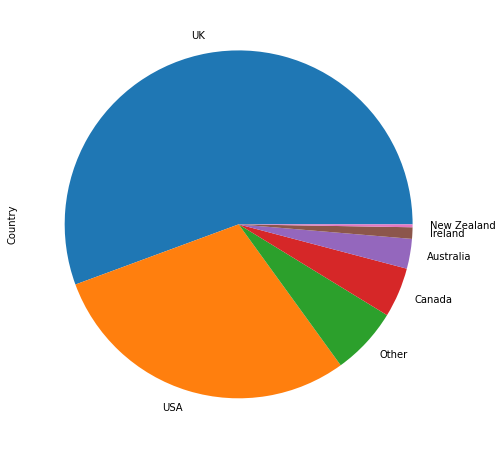

In [ ]:
countries = analysis['Country'].value_counts().plot(kind='pie', figsize=(8, 8))

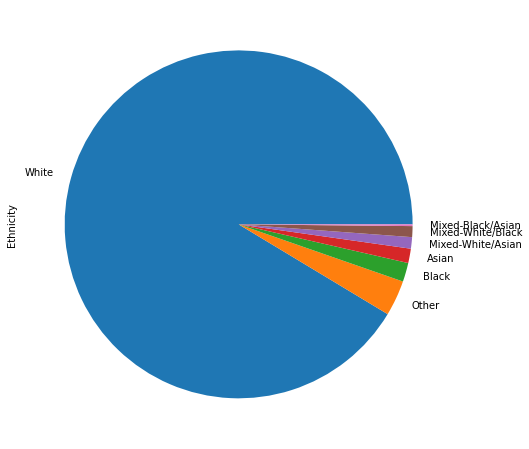

In [ ]:
ethnicity = analysis['Ethnicity'].value_counts().plot(kind='pie', figsize=(8, 8))

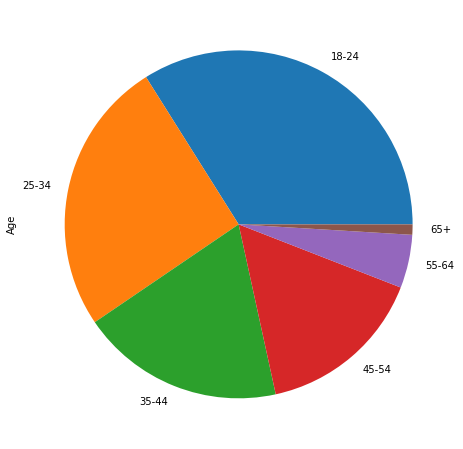

In [ ]:
age = analysis['Age'].value_counts().plot(kind='pie', figsize=(8, 8))

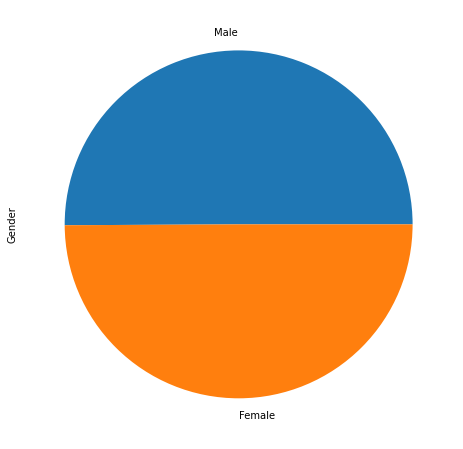

In [ ]:
gender = analysis['Gender'].value_counts().plot(kind='pie', figsize=(8, 8))

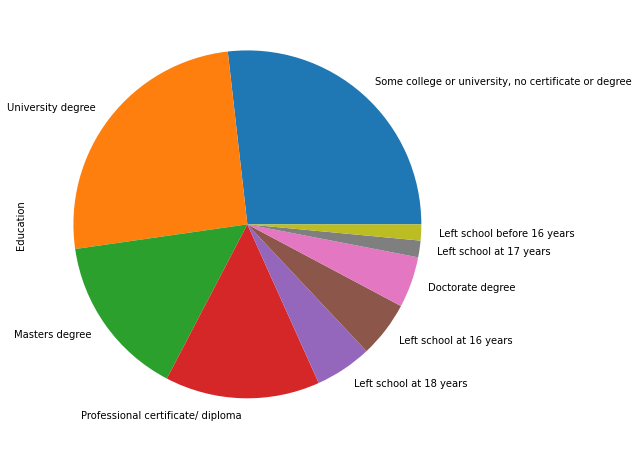

In [ ]:
education = analysis['Education'].value_counts().plot(kind='pie', figsize=(8,8))

Обощая, мы можем сказать, что наши данные описывают молодых ледей из США европейского происхождения с образованием.

## 2. Feature engeneering

In [ ]:
cocaine_df = data.copy()
cocaine_df['coke_user'] = cocaine_df['Cocaine consumption'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['crack_user'] = cocaine_df['Crack consumption'].apply(lambda x: 0.5 if x not in [0,1] else 0)
cocaine_df['both_user'] = cocaine_df[['coke_user', 'crack_user']].iloc[:].sum(axis=1)
cocaine_df['Cocaine_User'] = cocaine_df['both_user'].apply(lambda x: 1 if x > 0 else 0)
cocaine_df = cocaine_df.drop(['coke_user', 'crack_user', 'both_user' ], axis=1)

## Data Preprocessing

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt

In [ ]:
def preprocessing(df, column):
    df = df.copy()
    
    # Split df into X and y
    y = df[column]
    X = df.drop(column, axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

    return X_train, X_test, y_train, y_test

In [ ]:
def plot_confusion_matrix(y,y_predict):
    #Function to easily plot confusion matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues');
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['non-user', 'user']); ax.yaxis.set_ticklabels(['non-user', 'user'])

## Training

In [ ]:
X, X_test, y, y_test = preprocessing(cocaine_df, 'Cocaine_User')

In [ ]:
cat_features_names = feature_columns + drugs_columns
cat_features = [cocaine_df.columns.get_loc(col) for col in cat_features_names]

In [ ]:
print('Train set:', X.shape, y.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (1501, 30) (1501,)
Test set: (376, 30) (376,)


## Model Results

In [ ]:
%%time

from sklearn.model_selection import StratifiedKFold

n_fold = 4 
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=1)

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose': 200,
          'random_seed': 1
         }

test_data = Pool(data=X_test)

scores = []
prediction = np.zeros((X_test.shape[0], n_fold))
for fold_n, (train_index, valid_index) in enumerate(folds.split(X, y)):

    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = np.array(y.tolist())[train_index], np.array(y.tolist())[valid_index]
    
    train_data = Pool(data=X_train, 
                      label=y_train)
    
    valid_data = Pool(data=X_valid, 
                      label=y_valid)
    
    model = CatBoostClassifier(**params)
    model.fit(train_data,
              eval_set=valid_data, 
              use_best_model=True
             )
    
    score = model.get_best_score()['validation']['AUC']
    scores.append(score)

    y_pred = model.predict(X_test, prediction_type='Class')
    prediction[:,fold_n] = y_pred

print('CV mean: {:.4f}, CV std: {:.4f}'.format(np.mean(scores), np.std(scores)))

Learning rate set to 0.032624
0:	test: 0.9983250	best: 0.9983250 (0)	total: 3.91ms	remaining: 3.9s
200:	test: 1.0000000	best: 1.0000000 (1)	total: 275ms	remaining: 1.09s
400:	test: 1.0000000	best: 1.0000000 (1)	total: 556ms	remaining: 830ms
600:	test: 1.0000000	best: 1.0000000 (1)	total: 841ms	remaining: 558ms
800:	test: 1.0000000	best: 1.0000000 (1)	total: 1.12s	remaining: 279ms
999:	test: 1.0000000	best: 1.0000000 (1)	total: 1.41s	remaining: 0us

bestTest = 1
bestIteration = 1

Shrink model to first 2 iterations.
Learning rate set to 0.032632
0:	test: 1.0000000	best: 1.0000000 (0)	total: 3.51ms	remaining: 3.5s
200:	test: 1.0000000	best: 1.0000000 (0)	total: 301ms	remaining: 1.2s
400:	test: 1.0000000	best: 1.0000000 (0)	total: 565ms	remaining: 843ms
600:	test: 1.0000000	best: 1.0000000 (0)	total: 842ms	remaining: 559ms
800:	test: 1.0000000	best: 1.0000000 (0)	total: 1.12s	remaining: 279ms
999:	test: 1.0000000	best: 1.0000000 (0)	total: 1.4s	remaining: 0us

bestTest = 1
bestIteration =

In [ ]:
from scipy.stats import mode

In [ ]:
y_hat = mode(prediction, axis=1)[0].flatten()

In [ ]:
print('                  ACCURACY')
acc = accuracy_score(y_test, y_hat)
print(' Accuracy: {:.2%}'.format(acc))
print('---------------------------------------------')
print('                  F1 SCORES')
f1 = f1_score(y_test, y_hat)
print(' F1-Score: {:.5}'.format(f1))

                  ACCURACY
 Accuracy: 99.20%
---------------------------------------------
                  F1 SCORES
 F1-Score: 0.98842


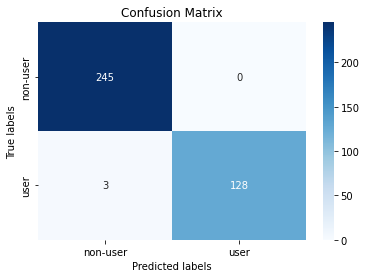

In [ ]:
plot_confusion_matrix(y_test, y_hat)

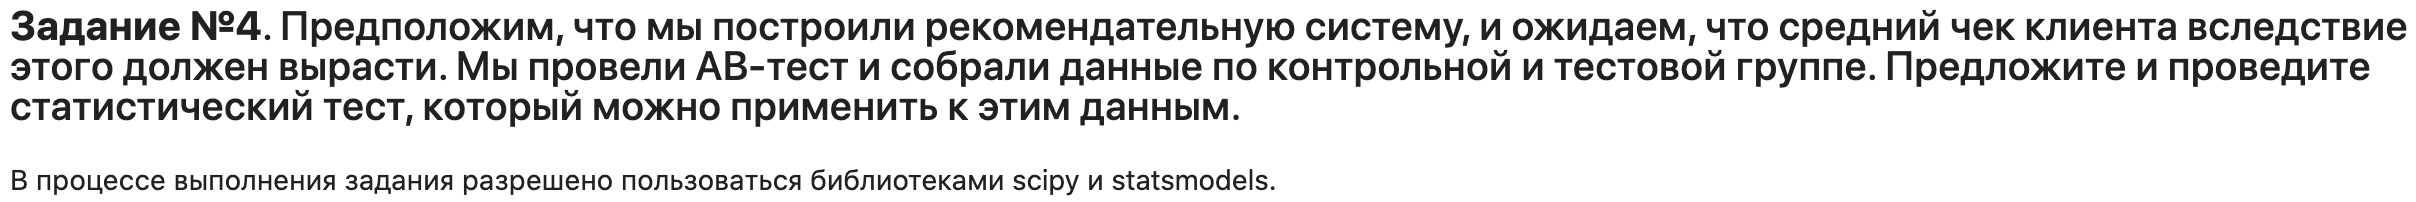

In [ ]:
import numpy as np

# Сгенерируем данные для задачи
control = np.random.lognormal(mean=5, sigma=2, size=(100000,))
test = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))

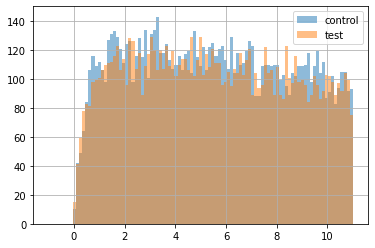

In [ ]:
bins = np.linspace(-1, 11, 100)

plt.hist(control, bins, alpha=0.5, label='control')
plt.hist(test , bins, alpha=0.5, label='test')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [ ]:
from scipy import stats 

In [ ]:
def eval_test(test_results,control_results):
    test_result = stats.ttest_ind(test_results, control_results)
    print('p-value is', test_result[1])
    if test_result[1] < 0.05:
        print('result is significant')
    else:
        print('result is not significant')

In [ ]:
eval_test(test, control)

p-value is 0.011877517497830649
result is significant
